In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay


import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
pd.options.mode.chained_assignment = None  # default='warn'

Using a variable for the filepath to ease location and change if needed

In [252]:
filepath="C:/Users/itrem/OneDrive/Dev/dsti/S23/Python Project/Goodreads-books-rating/data/books_analysis_output.csv"

Importing CSV with warning for incorrect data import to review whether it will have an impact on the data set information. Only 4 lines were skipped, which given the dataset volume are deprecable

In [253]:
dataset = pd.read_csv(filepath, on_bad_lines='warn')
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11046 non-null  int64  
 1   title               11046 non-null  object 
 2   authors             11046 non-null  object 
 3   average_rating      11046 non-null  float64
 4   isbn                11046 non-null  object 
 5   isbn13              11046 non-null  int64  
 6   language_code       11046 non-null  object 
 7   num_pages           11046 non-null  int64  
 8   ratings_count       11046 non-null  int64  
 9   text_reviews_count  11046 non-null  int64  
 10  publication_date    11046 non-null  object 
 11  publisher           11046 non-null  object 
 12  publication_year    11046 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


Reviwing basic stats of the dataset:

In [254]:
# Basic stats
print("# Number of rows : {}".format(dataset.shape[0]))
print()

print("# Display of dataset: ")
print("---------------------")
display(dataset.head())
print()

print("# Basics statistics: ")
print("--------------------")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("# Percentage of missing values: ")
print("-------------------------------")
display(100*dataset.isnull().sum()/dataset.shape[0])

print("# Percentage of NA values: ")
print("-------------------------------")
display(100*dataset.isna().sum()/dataset.shape[0])

print("# Feature value types:")
print("----------------------")
display(dataset.dtypes)

# Number of rows : 11046

# Display of dataset: 
---------------------


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006-01-01
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004-01-01
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003-01-01
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004-01-01
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004-01-01



# Basics statistics: 
--------------------


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
count,11046.000000,11046,11046,11046.000000,11046,1.104600e+04,11046,11046.000000,1.104600e+04,11046.00000,11046,11046,11046
unique,NaN,10275,6586,NaN,11046,NaN,26,NaN,NaN,NaN,3657,2255,86
top,NaN,The Iliad,P.G. Wodehouse,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage,2006-01-01
freq,NaN,9,40,NaN,1,NaN,8847,NaN,NaN,NaN,55,318,1691
mean,21295.168749,NaN,NaN,3.943134,NaN,9.759729e+12,NaN,336.762810,1.806794e+04,545.82772,NaN,NaN,NaN
std,13091.071135,NaN,NaN,0.295213,NaN,4.445135e+11,NaN,240.971269,1.128806e+05,2585.18629,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.000000,NaN,8.987060e+09,NaN,0.000000,1.000000e+00,0.00000,NaN,NaN,NaN
25%,10261.500000,NaN,NaN,3.780000,NaN,9.780345e+12,NaN,194.000000,1.100000e+02,9.00000,NaN,NaN,NaN
50%,20240.500000,NaN,NaN,3.960000,NaN,9.780574e+12,NaN,300.000000,7.645000e+02,48.00000,NaN,NaN,NaN
75%,32096.750000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.058750e+03,241.00000,NaN,NaN,NaN



# Percentage of missing values: 
-------------------------------


bookID                0.0
title                 0.0
authors               0.0
average_rating        0.0
isbn                  0.0
isbn13                0.0
language_code         0.0
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
publication_date      0.0
publisher             0.0
publication_year      0.0
dtype: float64

# Percentage of NA values: 
-------------------------------


bookID                0.0
title                 0.0
authors               0.0
average_rating        0.0
isbn                  0.0
isbn13                0.0
language_code         0.0
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
publication_date      0.0
publisher             0.0
publication_year      0.0
dtype: float64

# Feature value types:
----------------------


bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
publication_year       object
dtype: object

After reviewing of the stats we notice a few things:
- There are a few columns that do not provide any valuable information that could be used in a model: bookID (it's an index), isbn (book internal reference) and isbn13 (book internal reference). These can be removed
- After first converting the publication_date feature to datetime format an error was raised about two dates being out of range. Reprocessing the conversion with the parameter "errors='coerce'" we spotted to NaN values for index 8124 (11/31/2000) and 11017 (6/31/1982), so fixing those before proceeding to the conversion
- num_pages has a weird space on front

In [255]:
# Drop useless columns
useless_cols = ['bookID', 'isbn', 'isbn13']

print("Dropping useless columns...")
dataset = dataset.drop(useless_cols, axis=1) # axis = 1 indicates that we are dropping along the column axis

# Removing the unnecesary space

print("Renaming columns...")
dataset.rename(columns={'  num_pages': 'num_pages'}, inplace=True)

# Correcting and transforming the publication_date column

dataset.publication_date[8124] = "11/30/2000"
dataset.publication_date[11017] = "6/30/1982"

print("Converting date columns to the right format...")
dataset['publication_date']= pd.to_datetime(dataset['publication_date'], errors='raise', format='%m/%d/%Y')
dataset.dtypes

print("...Done.")
print("# Percentage of missing values: ")
print("-------------------------------")
display(100*dataset.isnull().sum()/dataset.shape[0])

print("# Percentage of NA values: ")
print("-------------------------------")
display(100*dataset.isna().sum()/dataset.shape[0])
display(dataset.head())
display(dataset.dtypes)


Dropping useless columns...
Renaming columns...
Converting date columns to the right format...
...Done.
# Percentage of missing values: 
-------------------------------


title                 0.0
authors               0.0
average_rating        0.0
language_code         0.0
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
publication_date      0.0
publisher             0.0
publication_year      0.0
dtype: float64

# Percentage of NA values: 
-------------------------------


title                 0.0
authors               0.0
average_rating        0.0
language_code         0.0
num_pages             0.0
ratings_count         0.0
text_reviews_count    0.0
publication_date      0.0
publisher             0.0
publication_year      0.0
dtype: float64

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006-01-01
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004-01-01
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,2003-01-01
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004-01-01
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic,2004-01-01


title                         object
authors                       object
average_rating               float64
language_code                 object
num_pages                      int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
publication_year              object
dtype: object

After this, we can remark the following:
- We noticed that books that are from a series are within parenthesis. We can extract this information to a new column and remove the series number
- Splitting authors into several columns could be cumbersome and provide little information, however knowing whether the book was single written or co-authored could have a significant meaning, so we can create a column that will contain the first author only, who is generally the main author
- Language has different values for english (en-us, en-gb, en-ca) which seems redundant. Unifiying to "eng"
- Further building the the decission tree model it gives back an error due to the amount of classes with a single member for the feature to be predicted average_rating, so we rounded the values and converted it to an int
- We also lower case all text to make sure this won't produce unnecesary classes

In [256]:
dataset.language_code.unique() # to spot the different eng language variants

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'ita',
       'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale'],
      dtype=object)

In [257]:
# Creating a new column for the in_series data
dataset.insert(1,"is_series", "no")

# Creating a new column for the main_author data
dataset.insert(3,"main_author", "no")
    

In [258]:
# Stripping the book series data from the title to the newly created column
for i in range(len(dataset.title)) :
    if "#" in str(dataset.title[i]): # All series have a volume number with # before. Flagging those help strip the series name
        dataset.is_series[i] = dataset.title[i][dataset.title[i].find("(")+1:dataset.title[i].find(")")].strip()[:dataset.title[i][dataset.title[i].find("(")+1:dataset.title[i].find(")")].find(" #")]
        dataset.title[i] = dataset.title[i][:dataset.title[i].find("(")-1] # to remove the series name and number from the book title
    
# Copying the main author name to the newly created column
for i in range(len(dataset.authors)):
    if "/" in str(dataset.authors[i]):
        dataset.main_author[i] = dataset.authors[i][:dataset.authors[i].find("/")]
    
    else:
       dataset.main_author[i] = dataset.authors[i]

# Rounding the average_rating values
dataset.average_rating = round(dataset.average_rating,1).astype('int')


# Lower casing all text
for l in dataset.columns.tolist():
    if dataset[l].dtype == 'O':
        dataset[l] = dataset[l].str.lower()

# Unifying all english variants to english "eng"
for i in range(len(dataset.language_code)):
    if "en-" in str(dataset.language_code[i]):
        dataset.language_code[i] = "eng"
        

print("\nFinal language codes present...\n", dataset.language_code.unique())

# Replacing year data with the actual year value only
dataset['publication_year'] = pd.DatetimeIndex(dataset['publication_date']).year.astype('int')

print("\nListing all years published...\n", dataset.publication_year.unique())

dataset.head()


Final language codes present...
 ['eng' 'fre' 'spa' 'mul' 'grc' 'enm' 'ger' 'jpn' 'ara' 'nl' 'zho' 'lat'
 'por' 'ita' 'rus' 'msa' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']

Listing all years published...
 [2006 2004 2003 2005 2002 1996 2001 2000 1990 1993 1997 1991 2012 1994
 1982 1986 1999 1987 1984 2007 1965 1998 1995 1964 1970 2011 1955 1988
 1985 1989 1963 2008 2009 1976 1975 1980 1992 1973 2019 1954 2015 1919
 1921 1923 1969 1968 1961 1953 1958 1983 1978 1929 1977 1979 1981 2010
 1950 1971 1960 1959 2013 2017 2016 1972 1947 1943 1974 1957 2014 2018
 1952 1935 1956 1966 1925 1962 1913 1928 1914 1949 1948 1967 1900 2020
 1931 1940]


,title,is_series,authors,main_author,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,harry potter and the half-blood prince,harry potter,j.k. rowling/mary grandpré,j.k. rowling,4,eng,652,2095690,27591,2006-09-16,scholastic inc.,2006
1,harry potter and the order of the phoenix,harry potter,j.k. rowling/mary grandpré,j.k. rowling,4,eng,870,2153167,29221,2004-09-01,scholastic inc.,2004
2,harry potter and the chamber of secrets,harry potter,j.k. rowling,j.k. rowling,4,eng,352,6333,244,2003-11-01,scholastic,2003
3,harry potter and the prisoner of azkaban,harry potter,j.k. rowling/mary grandpré,j.k. rowling,4,eng,435,2339585,36325,2004-05-01,scholastic inc.,2004
4,harry potter boxed set books 1-5,harry potter,j.k. rowling/mary grandpré,j.k. rowling,4,eng,2690,41428,164,2004-09-13,scholastic,2004


After the additional cleaning needed for this model to work, we start with the preprocessing and prediction based on the cleaned data

In [259]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "average_rating"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    4
1    4
2    4
3    4
4    4
Name: average_rating, dtype: int32

X :
                                       title      is_series  \
0     harry potter and the half-blood prince  harry potter    
1  harry potter and the order of the phoenix  harry potter    
2    harry potter and the chamber of secrets  harry potter    
3   harry potter and the prisoner of azkaban  harry potter    
4          harry potter boxed set  books 1-5  harry potter    

                      authors   main_author language_code  num_pages  \
0  j.k. rowling/mary grandpré  j.k. rowling           eng        652   
1  j.k. rowling/mary grandpré  j.k. rowling           eng        870   
2                j.k. rowling  j.k. rowling           eng        352   
3  j.k. rowling/mary grandpré  j.k. rowling           eng        435   
4  j.k. rowling/mary grandpré  j.k. rowling           eng       2690   

   ratings_count  text_reviews_count publication_date        pu

In [260]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_year']
Found categorical features  ['title', 'is_series', 'authors', 'main_author', 'language_code', 'publication_date', 'publisher']


In [261]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=30, stratify = Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [262]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean') # missing values will be replaced by columns' mean, although we know there are none

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first', handle_unknown = 'infrequent_if_exist') # no missing values in categorical data, so we only need the OHE


# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [263]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
                                                  title is_series  \
4341                                           outsider        no   
131                                             the war        no   
9752                                              bliss        no   
5594  janet  my mother and me: a memoir of growing u...        no   
4994                    a theory of fun for game design        no   

                            authors       main_author language_code  \
4341                   albert camus      albert camus           eng   
131   marguerite duras/barbara bray  marguerite duras           eng   
9752                   lynsay sands      lynsay sands           eng   
5594                 william murray    william murray           eng   
4994        raph koster/will wright       raph koster           eng   

      num_pages  ratings_count  text_reviews_count publication_date  \
4341        110             21               

...Done.
  (0, 0)	110.0
  (0, 1)	21.0
  (0, 2)	2.0
  (0, 3)	1983.0
  (0, 3864)	1.0
  (0, 8275)	1.0
  (0, 8763)	1.0
  (0, 14007)	1.0
  (0, 17449)	1.0
  (0, 17755)	1.0
  (0, 22330)	1.0
  (1, 0)	192.0
  (1, 1)	963.0
  (1, 2)	65.0
  (1, 3)	1994.0
  (1, 6876)	1.0
  (1, 8275)	1.0
  (1, 11899)	1.0
  (1, 16059)	1.0
  (1, 17449)	1.0
  (1, 18310)	1.0
  (1, 22233)	1.0
  (2, 0)	394.0
  (2, 1)	1742.0
  (2, 2)	108.0
  :	:
  (2, 17449)	1.0
  (2, 19201)	1.0
  (2, 21540)	1.0
  (3, 0)	320.0
  (3, 1)	36.0
  (3, 2)	8.0
  (3, 3)	2000.0
  (3, 2715)	1.0
  (3, 8275)	1.0
  (3, 13839)	1.0
  (3, 17398)	1.0
  (3, 17449)	1.0
  (3, 18953)	1.0
  (3, 22114)	1.0
  (4, 0)	256.0
  (4, 1)	2113.0
  (4, 2)	181.0
  (4, 3)	2004.0
  (4, 239)	1.0
  (4, 8275)	1.0
  (4, 12729)	1.0
  (4, 16644)	1.0
  (4, 17449)	1.0
  (4, 19862)	1.0
  (4, 21804)	1.0

Encoding labels...
4341    4
131     3
9752    4
5594    3
4994    3
Name: average_rating, dtype: int32
...Done
[3 2 3 2 2]
Performing preprocessings on test set...
                  

c:\Users\itrem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In order to find out the best parameters for our Decission Tree, we perform a grid search that will give us the optimal values

In [264]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...


c:\Users\itrem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best validation accuracy :  0.5857082061677149


In [265]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[2 2 2 ... 2 2 2]

Probabilities on training set...
...Done.
[[2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 ...
 [0.00000000e+00 6.47249191e-03 6.01941748e-01 3.91585761e-01
  0.00000000e+00]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]]



In [266]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[2 3 2 ... 3 2 3]

Probabilities on test set...
...Done.
[[2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 [0.00000000e+00 0.00000000e+00 2.76150628e-01 7.23849372e-01
  0.00000000e+00]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 ...
 [0.00000000e+00 0.00000000e+00 2.76923077e-01 7.23076923e-01
  0.00000000e+00]
 [2.55167134e-04 6.63434550e-03 5.68002041e-01 4.22301608e-01
  2.80683848e-03]
 [0.00000000e+00 0.00000000e+00 2.12500000e-01 7.87500000e-01
  0.00000000e+00]]



In [267]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average='macro'))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average='macro'))
print()

accuracy on training set :  0.6432882665379044
accuracy on test set :  0.6060825488776249

f1-score on training set :  0.26735761370326344
f1-score on test set :  0.2414797693662778



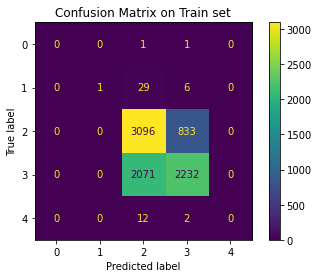

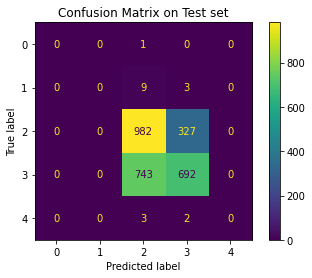

In [268]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()